In [1]:
from sklearn import linear_model
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.metrics import confusion_matrix

import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
titanc_data = pd.read_csv("titanic.csv")
titanc_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# ignoring (passengerid, name, cabin, sipsp, parch,Ticket)
cleaned_data = titanc_data.drop(
    ["PassengerId", "Name", "SibSp", "Parch", "Cabin", "Ticket", "Embarked"],
    axis=1)
cleaned_data

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [4]:
print(cleaned_data.info())
# droping null data
cleaned_data.dropna(inplace=True)
print(cleaned_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      714 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 33.5+ KB
None


In [5]:
# making the Target is survived coulmn and drop it from the cleaned data
target = cleaned_data.Survived
cleaned_data = cleaned_data.drop("Survived", axis=1)
target

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [6]:
# lenght of survived and not survived
print("All:      ", len(target))
print("Survived: ", len(target[target == 1]))
print("Died:     ", len(target[target == 0]))

All:       714
Survived:  290
Died:      424


In [7]:
cleaned_data

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
885,3,female,39.0,29.1250
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
889,1,male,26.0,30.0000


In [8]:
print("Sex count: ", cleaned_data.Sex.value_counts())
print("\nPclass count: ", cleaned_data.Pclass.value_counts())

Sex count:  Sex
male      453
female    261
Name: count, dtype: int64

Pclass count:  Pclass
3    355
1    186
2    173
Name: count, dtype: int64


In [9]:
Sex_dummies = pd.get_dummies(cleaned_data.Sex)
Sex_dummies = Sex_dummies.astype(int)  # make the values 1 0

Pclass_dummies = pd.get_dummies(cleaned_data.Pclass)
Pclass_dummies = Pclass_dummies.astype(int)
Pclass_dummies

merged = pd.concat([cleaned_data, Sex_dummies, Pclass_dummies], axis='columns')
merged = merged.drop(["Sex", "Pclass"], axis=1)
merged = merged.astype(int)
merged

,Age,Fare,female,male,1,2,3
0,22,7,0,1,0,0,1
1,38,71,1,0,1,0,0
2,26,7,1,0,0,0,1
3,35,53,1,0,1,0,0
4,35,8,0,1,0,0,1
...,...,...,...,...,...,...,...
885,39,29,1,0,0,0,1
886,27,13,0,1,0,1,0
887,19,30,1,0,1,0,0
889,26,30,0,1,1,0,0


In [10]:
# Spiliting
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
    merged, target, test_size=0.3, random_state=15)
print(len(xtrain), len(xtest))
xtrain.columns = xtrain.columns.astype(str)
xtest.columns = xtest.columns.astype(str)

499 215


In [11]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     714 non-null    int32
 1   Fare    714 non-null    int32
 2   female  714 non-null    int32
 3   male    714 non-null    int32
 4   1       714 non-null    int32
 5   2       714 non-null    int32
 6   3       714 non-null    int32
dtypes: int32(7)
memory usage: 25.1 KB


In [12]:
LinearModel = linear_model.LinearRegression()

In [13]:
LinearModel.fit(xtrain, ytrain)

LinearRegression()

In [14]:
print(LinearModel.score(xtrain, ytrain))
print(LinearModel.score(xtest, ytest))

0.3767274200354096
0.40519413156840867


<Axes: >

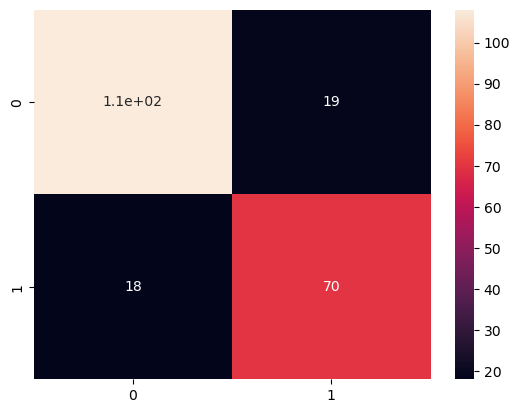

In [29]:
y_predicted = LinearModel.predict(xtest)
y_predicted = [0 if value < 0.5 else 1 for value in y_predicted]

CM = confusion_matrix(ytest, y_predicted)
sn.heatmap(CM, annot=True)